# Quantum Neural Network (QNN) - Basic

In [46]:
# Impor librari
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, circuit_drawer

from sympy import symbols, sqrt, latex

from PIL import Image

# 2. Entanglement

### Single Qubit

In [47]:
# 1 fitur klasik
x = 5

In [48]:
# Membuat QC dengan 2 qubit
qc1 = QuantumCircuit(2)

# Rotasi H (Hadamard) pada qubit dengan nilai fitur x sebagai sudut rotasi
qc1.h(0)

# Gerbang CNOT untuk membuat entanglement antar keadaan qubit
qc1.cx(0, 1)

# Menjalankan QC pada simulator statevector
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc1, simulator).result()
statevector = result.get_statevector()

# Menampilkan QC
print(qc1)

# Menampilkan hasil statevector
print(statevector)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


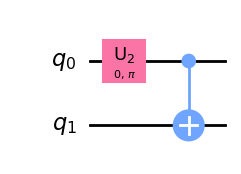

In [49]:
qc1.decompose().draw(output="mpl", fold=50)          # fold=50, maksimal blok-gate yang tampil dalam satu baris

### Multi Qubit

In [50]:
# Nilai fitur klasik
x1 = 5
x2 = 8

# Membuat sirkuit quantum dengan 2 qubit
qc2 = QuantumCircuit(2)

# Hadamard pada qubit qi
qc2.h(0)
qc2.h(1)

# Rotasi X pada qubit qi sesuai dengan xi
qc2.rx(x1, 0)
qc2.rx(x2, 1)

# Menambahkan gerbang CNOT untuk membuat entanglement antar qubit
qc2.cx(0, 1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc2, simulator).result()
statevector = result.get_statevector()
print(qc2)
print(statevector)

     ┌───┐┌───────┐     
q_0: ┤ H ├┤ Rx(5) ├──■──
     ├───┤├───────┤┌─┴─┐
q_1: ┤ H ├┤ Rx(8) ├┤ X ├
     └───┘└───────┘└───┘
Statevector([0.48829381-0.10755999j, 0.48829381-0.10755999j,
             0.48829381-0.10755999j, 0.48829381-0.10755999j],
            dims=(2, 2))


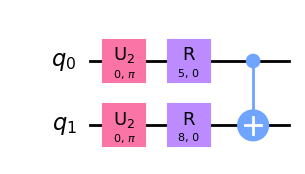

In [51]:
qc2.decompose().draw(output="mpl", fold=50)          # fold=50, maksimal blok-gate yang tampil dalam satu baris

In [52]:
# 3 fitur klasik
x1 = 5
x2 = 8
x3 = 12

In [59]:
# Nilai fitur klasik
x1 = 0.5
x2 = 0.8
x3 = 1.2

# Membuat QC dengan 3 qubit
qc3 = QuantumCircuit(5)

# Hadamard dan Rotasi X pada qubit qi sesuai dengan nilai fitur x1
qc3.h(0)
qc3.h(1)
qc3.h(2)
qc3.h(3)
qc3.h(4)
qc3.rx(x1, 0)
qc3.rx(x2, 1)
qc3.rx(x3, 2)
qc3.z(3)
qc3.z(4)

# Entanglement menggunakan CNOT 
qc3.cx(0, 1)
#(misal: qubit 0 sebagai kontrol, qubit 1 sebagai target)
qc3.h(2)
qc3.cx(0, 2)

# Menjalankan QC pada simulator statevector
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc3, simulator).result()
statevector = result.get_statevector()

# Menampilkan QC
print(qc3)

# Menampilkan hasil statevector
print(statevector)

     ┌───┐┌─────────┐          
q_0: ┤ H ├┤ Rx(0.5) ├──■────■──
     ├───┤├─────────┤┌─┴─┐  │  
q_1: ┤ H ├┤ Rx(0.8) ├┤ X ├──┼──
     ├───┤├─────────┤├───┤┌─┴─┐
q_2: ┤ H ├┤ Rx(1.2) ├┤ H ├┤ X ├
     ├───┤└──┬───┬──┘└───┘└───┘
q_3: ┤ H ├───┤ Z ├─────────────
     ├───┤   ├───┤             
q_4: ┤ H ├───┤ Z ├─────────────
     └───┘   └───┘             
Statevector([ 0.07883059-0.23724615j,  0.        +0.j        ,
              0.07883059-0.23724615j,  0.        +0.j        ,
              0.        +0.j        ,  0.07883059-0.23724615j,
              0.        +0.j        ,  0.07883059-0.23724615j,
             -0.07883059+0.23724615j,  0.        +0.j        ,
             -0.07883059+0.23724615j,  0.        +0.j        ,
              0.        +0.j        , -0.07883059+0.23724615j,
              0.        +0.j        , -0.07883059+0.23724615j,
             -0.07883059+0.23724615j,  0.        +0.j        ,
             -0.07883059+0.23724615j,  0.        +0.j        ,
              0.  

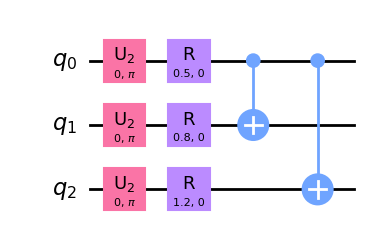

In [ ]:
qc3.decompose().draw(output="mpl", fold=50)          # fold=50, maksimal blok-gate yang tampil dalam satu baris